# Data import

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
messages = []
with open('/kaggle/input/ai-defence-summer-school-2024/messages/messages.jsonl', 'r') as file:
    for line in file:
        messages.append(json.loads(line))
messages_df = pd.DataFrame(messages)
train_df = pd.read_csv('/kaggle/input/ai-defence-summer-school-2024/train.csv')
test_df = pd.read_csv('/kaggle/input/ai-defence-summer-school-2024/test.csv')

train_merged = train_df.merge(messages_df, on='source_id', how='left')
test_merged = test_df.merge(messages_df, on='source_id', how='left')

print("Train Merged DataFrame:")
print(train_merged.head())

print("\nTest Merged DataFrame:")
print(test_merged.head())


Train Merged DataFrame:
   source_id                   source_url         source_category  message_id  \
0     133653  https://twitter.com/IFR2022  AGGRESSIVE_INFORMATION     4592110   
1     133653  https://twitter.com/IFR2022  AGGRESSIVE_INFORMATION     3318120   
2      39644     https://t.me/warfakeskrm  RESTRAINED_INFORMATION  1405764467   
3      39644     https://t.me/warfakeskrm  RESTRAINED_INFORMATION  1405764414   
4      39644     https://t.me/warfakeskrm  RESTRAINED_INFORMATION  1405215197   

                                                text  impressions  reactions  \
0  @Noreen77777 Ukraine (as in the Ukrainian gove...        112.0         12   
1  @OlivesStones @VashuVats_ @apmassaro3 Correct!...         10.0          1   
2  Накануне киевский режим вновь продемонстрирова...        349.0         11   
3  Фейк: Жертвы на пляже в Севастополе появились ...        309.0          8   
4  Украинские ЦИПсО продолжают использовать траге...        415.0         13   

   share

# EDA

In [4]:
df = train_merged

print("Summary Statistics:\n", df.describe())

print("\nMissing Values:\n", df.isnull().sum())

Summary Statistics:
           source_id    message_id   impressions      reactions        shares  \
count  2.633530e+05  2.633530e+05  2.633220e+05  263353.000000  2.613190e+05   
mean   3.908455e+07  1.239688e+09  1.255272e+04     207.421024  2.587820e+02   
std    5.134795e+07  3.426365e+08  8.575191e+04    1377.588424  6.932701e+03   
min    2.000000e+00  1.500240e+05  0.000000e+00       0.000000  0.000000e+00   
25%    2.284510e+05  1.252752e+09  2.100000e+01       0.000000  1.000000e+00   
50%    2.046354e+06  1.395971e+09  7.345000e+02       7.000000  4.000000e+00   
75%    8.664938e+07  1.418344e+09  4.970750e+03      69.000000  2.200000e+01   
max    1.450078e+08  1.434559e+09  1.236680e+07  223784.000000  3.027542e+06   

            comments  published_at  
count  263353.000000  2.633530e+05  
mean        7.278554  1.709677e+12  
std       152.746414  2.336284e+10  
min         0.000000  1.319992e+12  
25%         0.000000  1.714020e+12  
50%         0.000000  1.718542e+12  

In [5]:
train_merged = train_merged.drop(columns=['source_id', 'message_id'])

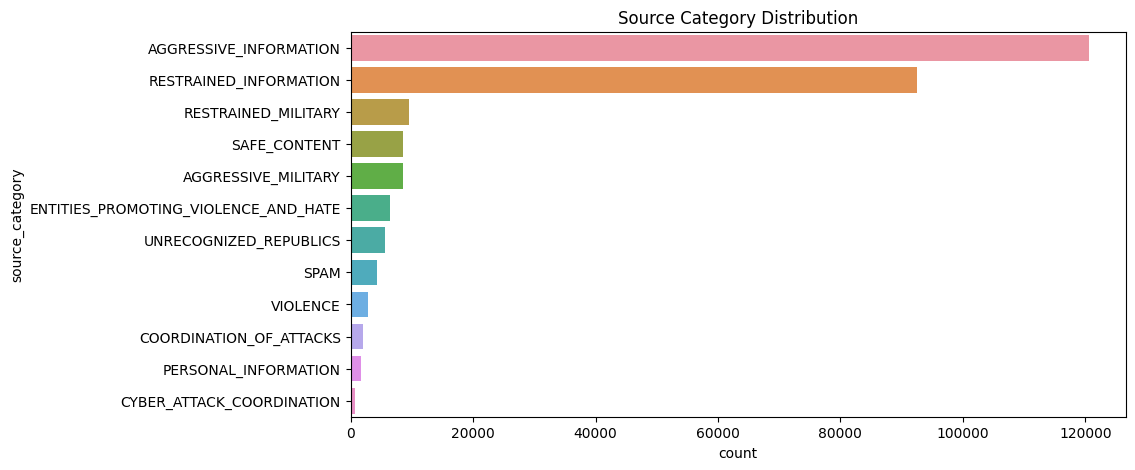

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(y='source_category', data=df, order=df['source_category'].value_counts().index)
plt.title("Source Category Distribution")
plt.show()


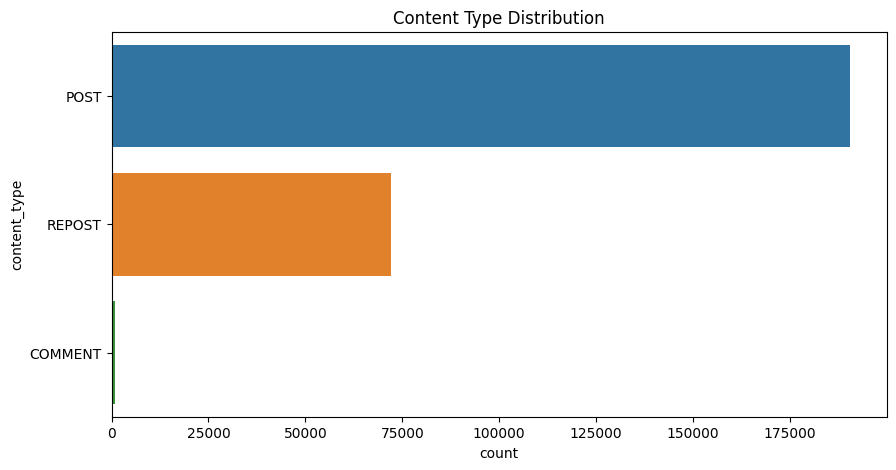

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(y='content_type', data=df, order=df['content_type'].value_counts().index)
plt.title("Content Type Distribution")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


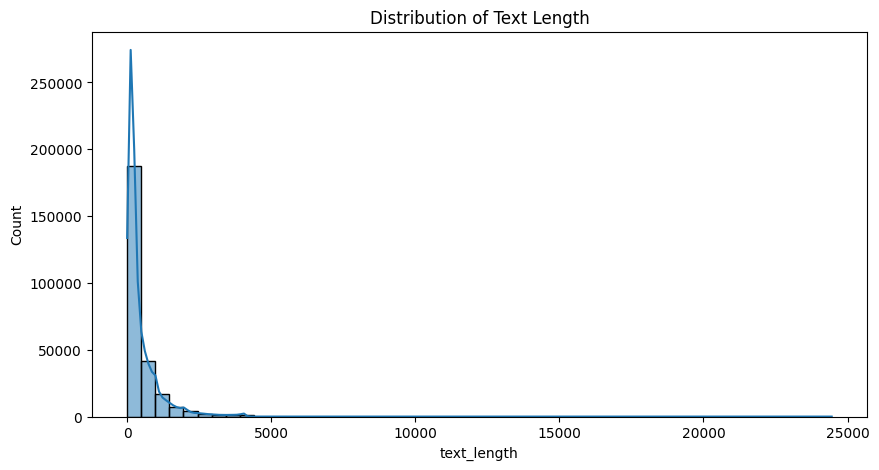

In [8]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Text Length")
plt.show()

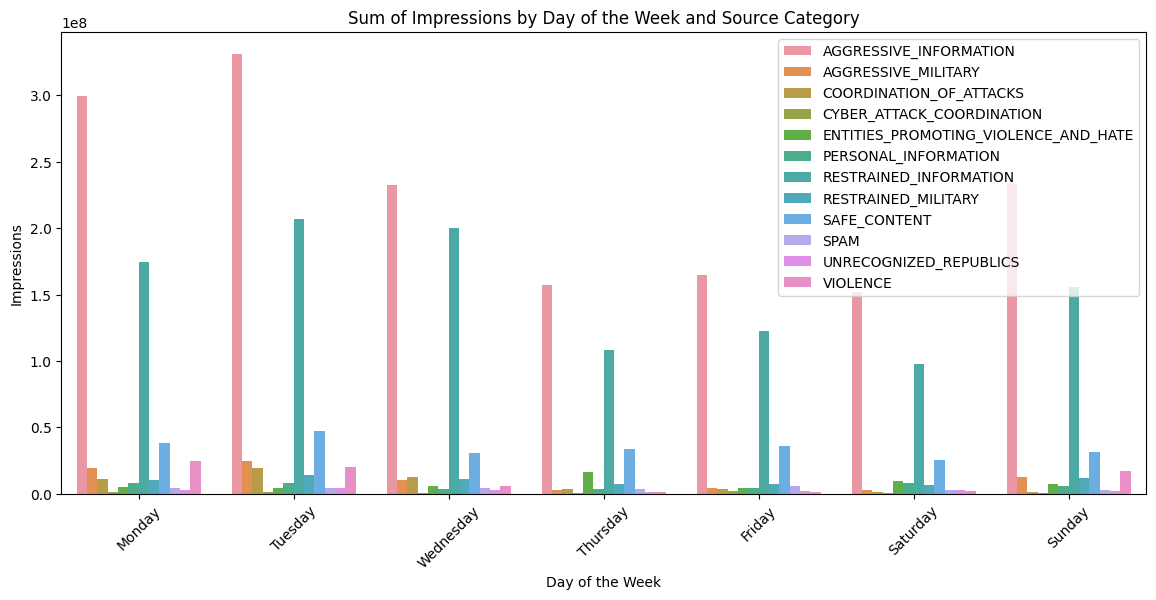

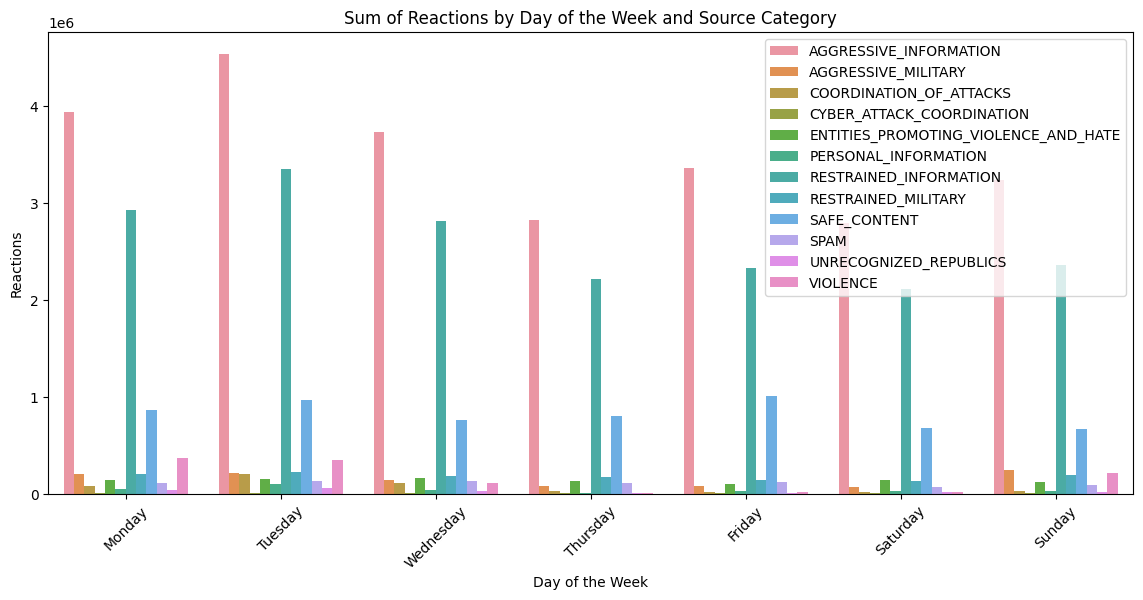

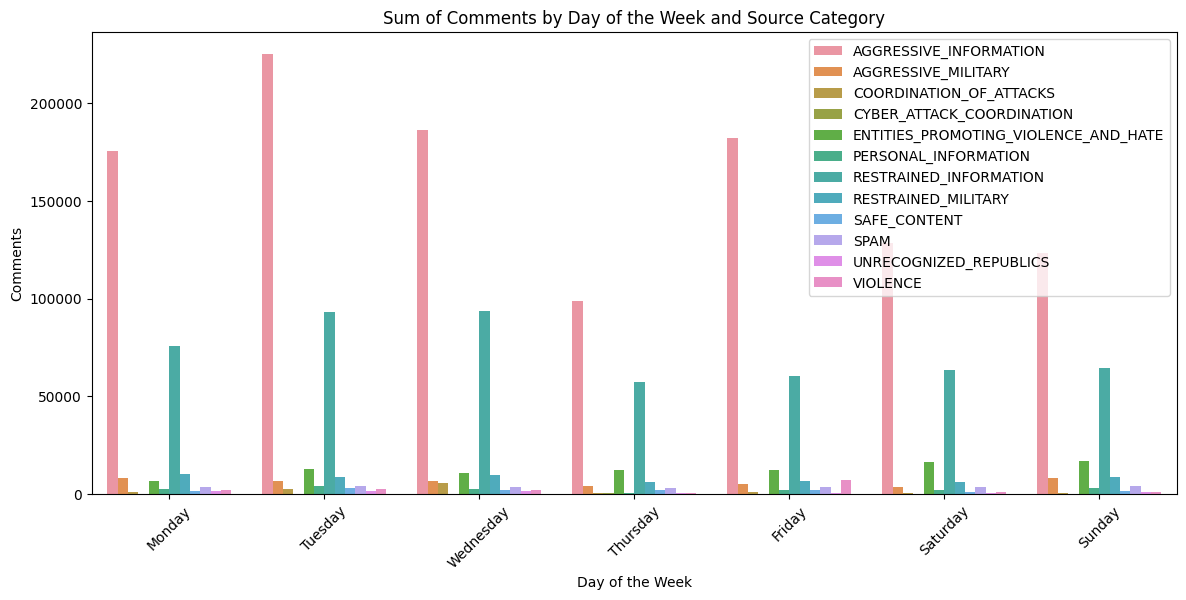

In [9]:
df = train_merged.copy()
df['published_at'] = pd.to_datetime(df['published_at'], unit='ms')

df = df[df['published_at'].dt.year >= 2022]

df['day_of_week'] = df['published_at'].dt.day_name()
df['hour_of_day'] = df['published_at'].dt.hour
df_day_of_week_category = df.groupby(['day_of_week', 'source_category'])[['impressions', 'reactions', 'comments']].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='day_of_week', y='impressions', hue='source_category', data=df_day_of_week_category, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sum of Impressions by Day of the Week and Source Category')
plt.xlabel('Day of the Week')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='day_of_week', y='reactions', hue='source_category', data=df_day_of_week_category, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sum of Reactions by Day of the Week and Source Category')
plt.xlabel('Day of the Week')
plt.ylabel('Reactions')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='day_of_week', y='comments', hue='source_category', data=df_day_of_week_category, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sum of Comments by Day of the Week and Source Category')
plt.xlabel('Day of the Week')
plt.ylabel('Comments')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


In [10]:
df = train_merged
print("Summary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

Summary Statistics:
         impressions      reactions        shares       comments  published_at
count  2.633220e+05  263353.000000  2.613190e+05  263353.000000  2.633530e+05
mean   1.255272e+04     207.421024  2.587820e+02       7.278554  1.709677e+12
std    8.575191e+04    1377.588424  6.932701e+03     152.746414  2.336284e+10
min    0.000000e+00       0.000000  0.000000e+00       0.000000  1.319992e+12
25%    2.100000e+01       0.000000  1.000000e+00       0.000000  1.714020e+12
50%    7.345000e+02       7.000000  4.000000e+00       0.000000  1.718542e+12
75%    4.970750e+03      69.000000  2.200000e+01       1.000000  1.719220e+12
max    1.236680e+07  223784.000000  3.027542e+06   52455.000000  1.719459e+12

Missing Values:
 source_url            0
source_category       0
text                  0
impressions          31
reactions             0
shares             2034
comments              0
published_at          0
content_type          0
dtype: int64


# Preprocessing

In [11]:
from string import punctuation
import re
import logging
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
# import emoji



class NumbersFromTextSeparator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.re_sep_digit = re.compile(r"([\d]+)([а-яА-Я]+)")
        return self

    def transform(self, X):
        X = X.copy()
        return X.apply(lambda x: self.re_sep_digit.sub(r"\1 \2", x))


class WhitespaceCharacterRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.re_whitespaces_rem = re.compile(r'\s+', re.MULTILINE)
        return self

    def transform(self, X):
        return X.apply(lambda x: self.re_whitespaces_rem.sub(r" ", x))


class MultipleWhitespaceRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(lambda x: re.sub(' +', ' ', x))


class PunctuationRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.punctiation = punctuation + '—«»–“”―‼…‒' + '№•°¯−→⁃'
        return self

    def transform(self, X):
        return X.apply(
            lambda x: re.sub('[%s]' % re.escape(self.punctiation), '', x)
            )


class EmojiRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.re_emojis_rem = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U0001F1F2-\U0001F1F4"  # Macau flag
            u"\U0001F1E6-\U0001F1FF"  # flags
            u"\U0001F600-\U0001F64F"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U0001F1F2"
            u"\U0001F1F4"
            u"\U0001F620"
            u"\u200d"
            u"\u2640-\u2642"
            "]+", flags=re.UNICODE
            )
        return self

    def transform(self, X):
        return X.apply(lambda x: self.re_emojis_rem.sub(r"", x))


class EmojiRemover2(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.apply(lambda x: emoji.replace_emoji(x, replace=''))
        return X


class StripFlankingSpaces(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.str.strip()


class LowerCaser(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.str.lower()


class UrlRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.re_url = re.compile(r"https?://\S+|www\.\S+")
        return self

    def transform(self, X):
        return X.apply(lambda x: self.re_url.sub(r" ", x))


class TmeRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.tme = re.compile(r'\st.me/.+')
        return self

    def transform(self, X):
        return X.apply(lambda x: self.tme.sub(r" ", x))


class EmailRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.re_email = re.compile(r'[\w\.-]+@[\w\.-]+')
        return self

    def transform(self, X):
        return X.apply(lambda x: self.re_email.sub(r" ", x))


class HashtagRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.re_hashtag = re.compile(r'#(?<=)\w+')
        return self

    def transform(self, X):
        return X.apply(lambda x: self.re_hashtag.sub(r" ", x))


class AtRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.re_at = re.compile(r'@(?<=)\w+')
        return self

    def transform(self, X):
        return X.apply(lambda x: self.re_at.sub(r" ", x))


class HeaderCleaner(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    @staticmethod
    def filt(text):
        subs_filt = re.search(
            r'п[іо]дпи(((сать?|ш)[иь])|суй)(те)?с[яь]',
            text,
            flags=re.IGNORECASE | re.UNICODE
            )
        bot_channel_filt = re.search(
            r'(\W@)|( \| )|(наш канал)|((в|на) ?.{0,5} бот)|(банка на)|(посилання на)|(номер (картки|банки))|(Реальная? В[іо]йна)|(труха)|(слат[иь] нов)',
            text,
            flags=re.IGNORECASE | re.UNICODE
            )
        bank_info = re.search(
            r'(UAH|USD|EUR|Paypal|BTC|ETH|Банк[ау]|Приват|картк?и|Моно(банк)?|Ціль|Крипта|Privat|Mono|Р\/р |Реквізити|Patreon|coffee|валюта).{0,5}:',
            text,
            flags=re.IGNORECASE | re.UNICODE
            )

        return (
            len(text) > 0
            # and not set(text) & set(['@', '|'])
            and subs_filt is None
            and bot_channel_filt is None
            and bank_info is None
            )

    @staticmethod
    def header_detector(row):
        res = []
        # for sent in row.split('. '):
        for sent in re.split(r'(?<=[\.\!\?])\s+', row):
            res.extend(el for el in re.split(r'(\r\n|\r|\n)', sent)
                       if HeaderCleaner.filt(el)
                       )

        return '. '.join(res)

    def transform(self, X):
        return X.apply(HeaderCleaner.header_detector)


class SentenceEnding(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        # self.sent_ending = re.compile('[!?\\. ]{3,}')
        self.sent_ending = re.compile(r'(?<=[!?\.: ])[\. ]{1,2}')
        self.sent_ending2 = re.compile(r'( [\.:] )')
        return self

    def transform(self, X):
        X = X.apply(lambda x: self.sent_ending2.sub(r". ", x))
        return X.apply(lambda x: self.sent_ending.sub(r" ", x))


class SentenceSeparator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.sent_separator = re.compile(r'(\.|\. | )?\\n\s*\\n')
        return self

    def transform(self, X):
        return X.apply(lambda x: self.sent_separator.sub(r". ", x))


class CardNumberRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):

        self.card_num = re.compile(r'U?A?\d{2} ?[\d ]{14,}')
        return self

    def transform(self, X):
        return X.apply(lambda x: self.card_num.sub(r" ", x))


class PhoneNumberRemover(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.card_num = re.compile(r'\+?3?8? ?\(?\d{3}\)?[ -]*\d{3,4}[ -]*\d{2,4}[ -]*\d{2,4}?')
        return self

    def transform(self, X):
        return X.apply(lambda x: self.card_num.sub(r" ", x))


class ShortMessageFilterer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        logging.info(f'Input shape: {X.shape[0]}')
        return self

    def transform(self, X):
        filt = (X.apply(len) > 10) & (X.notna())
        logging.info(f'Output shape: {filt.sum()}')
        return X[filt]

preprocessing_pipe = make_pipeline(
    NumbersFromTextSeparator(),
    TmeRemover(),  # expand
    UrlRemover(),
    SentenceSeparator(),
    HeaderCleaner(),
    WhitespaceCharacterRemover(),
    EmailRemover(),
    CardNumberRemover(),
    PhoneNumberRemover(),  # use after CardNumberRemover!
    HashtagRemover(),
    # AtRemover(),  # redundant if HeaderCleaner is present upstream
    EmojiRemover(),  # fast, doesn't remove all; redundant if #2 is used
    # EmojiRemover2(),  # too slow: 105 seconds, but removes all emojis
    # EmoticonRemover(),  # too slow: 47 seconds
    SentenceEnding(),
    PunctuationRemover(),
    MultipleWhitespaceRemover(),  # after removing punctuation
    StripFlankingSpaces(),
    LowerCaser(),
    ShortMessageFilterer()
)

In [12]:
cleaned_data = preprocessing_pipe.fit_transform(train_merged['text'])

In [14]:
def transform(df, clean_data):
    cleaned_data_df = clean_data.reset_index()
    cleaned_data_df = cleaned_data_df.rename(columns={'text': 'cleaned_text'})
    newdf = df.reset_index()
    newdf = newdf.merge(cleaned_data_df, on='index', how='left')
    newdf = newdf.fillna("")
    
    return newdf

In [15]:
newdf = transform(train_merged, cleaned_data)
newdf.head()

,index,source_url,source_category,text,impressions,reactions,shares,comments,published_at,content_type,cleaned_text
0,0,https://twitter.com/IFR2022,AGGRESSIVE_INFORMATION,@Noreen77777 Ukraine (as in the Ukrainian gove...,112.0,12,3.0,2,1679085772000,POST,noreen77777 ukraine as in the ukrainian govern...
1,1,https://twitter.com/IFR2022,AGGRESSIVE_INFORMATION,@OlivesStones @VashuVats_ @apmassaro3 Correct!...,10.0,1,0.0,0,1674658676000,POST,he cares about ukraine insofar as it helps his...
2,2,https://t.me/warfakeskrm,RESTRAINED_INFORMATION,Накануне киевский режим вновь продемонстрирова...,349.0,11,0.0,0,1719240109000,REPOST,накануне киевский режим вновь продемонстрирова...
3,3,https://t.me/warfakeskrm,RESTRAINED_INFORMATION,Фейк: Жертвы на пляже в Севастополе появились ...,309.0,8,2.0,0,1719240088000,REPOST,фейк жертвы на пляже в севастополе появились и...
4,4,https://t.me/warfakeskrm,RESTRAINED_INFORMATION,Украинские ЦИПсО продолжают использовать траге...,415.0,13,3.0,0,1719230492000,POST,украинские ципсо продолжают использовать траге...


# XGBOOST

In [16]:
from sklearn.model_selection import train_test_split
import gensim
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from gensim.models.fasttext import FastText
from gensim.models import KeyedVectors

In [17]:
X_train, X_test, y_train, y_test = train_test_split(newdf['cleaned_text'], newdf['source_category'], test_size=0.1, random_state=13)

In [18]:
def preprocess_text(text):
    return text.lower().split()

tokenized_data = [preprocess_text(text) for text in newdf['cleaned_text']]

In [19]:
tokenized_data_train = [preprocess_text(text) for text in X_train]
tokenized_data_test = [preprocess_text(text) for text in X_test]

In [20]:
WORD_VECTOR_SIZE = 256
DOCUMENT_VECTOR_SIZE = 128

fasttext_model = FastText(vector_size=WORD_VECTOR_SIZE, window=7, min_count=5, sg=1, workers=8)
fasttext_model.build_vocab(corpus_iterable=tokenized_data)
fasttext_model.train(corpus_iterable=tokenized_data, total_examples=len(tokenized_data), epochs=5)

(70896092, 82549780)

In [21]:
docVecTrain = []
# maybe add stopwords

for tokens in tokenized_data_train:
    if tokens:
        wordVectors = [fasttext_model.wv[token] for token in tokens if token in fasttext_model.wv]
        if wordVectors:
            docVecEntity = np.sum(wordVectors, axis=0)
            docVecResult = np.divide(docVecEntity, len(tokens))
            docVecTrain.append(docVecResult)
        else:
            docVecTrain.append(np.zeros_like(fasttext_model.wv.vectors[0]))  # or handle differently as needed
    else:
        docVecTrain.append(np.zeros_like(fasttext_model.wv.vectors[0]))
    

In [22]:
X_train_vectorized = np.array(docVecTrain)

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb

In [24]:
target_values = y_train.unique()

encode_dict = {value: idx for idx, value in enumerate(target_values)}
decode_dict = {idx: value for idx, value in enumerate(target_values)}

y_train_encoded = y_train.map(encode_dict)
y_train_encoded

6135      0
86148     1
161556    1
194622    2
205011    3
         ..
218868    1
164706    2
256742    1
253456    1
178352    3
Name: source_category, Length: 237017, dtype: int64

In [25]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_vectorized, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
docVecTest = []

for tokens in tokenized_data_test:
    if tokens:
        wordVectors = [fasttext_model.wv[token] for token in tokens if token in fasttext_model.wv]
        if wordVectors:
            docVecEntity = np.sum(wordVectors, axis=0)
            docVecResult = np.divide(docVecEntity, len(tokens))
            docVecTest.append(docVecResult)
        else:
            docVecTest.append(np.zeros_like(fasttext_model.wv.vectors[0]))  # or handle differently as needed
    else:
        docVecTest.append(np.zeros_like(fasttext_model.wv.vectors[0]))

In [27]:
def evaluate_model(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='micro')
    print("F1 score", f1)
    ac = accuracy_score(y_true, y_pred)
    print("Accuracy", ac)
    pc = precision_score(y_true, y_pred, average='micro')
    print("Precision", pc)
    rc = recall_score(y_true, y_pred, average='micro')
    print("Recall", rc)


In [29]:
y_pred_train = xgb_classifier.predict(X_train_vectorized)
evaluate_model(y_train_encoded, y_pred_train)

F1 score 0.6334904247374661
Accuracy 0.6334904247374661
Precision 0.6334904247374661
Recall 0.6334904247374661


In [28]:
y_test_encoded = y_test.map(encode_dict)
X_test_vectorized = np.array(docVecTest)

y_pred = xgb_classifier.predict(X_test_vectorized)
evaluate_model(y_test_encoded, y_pred)

F1 score 0.5089990886998785
Accuracy 0.5089990886998785
Precision 0.5089990886998785
Recall 0.5089990886998785


# Kaggle submition

In [30]:
cleaned_test = preprocessing_pipe.fit_transform(test_merged['text'])

In [31]:
trans = transform(test_merged, cleaned_test)
trans.tail

<bound method NDFrame.tail of          index  source_id                    source_url  message_id  \
0            0     241835  https://t.me/ViktorVikarchuk  1396473240   
1            1     241835  https://t.me/ViktorVikarchuk  1306201695   
2            2     241835  https://t.me/ViktorVikarchuk  1206077589   
3            3     241835  https://t.me/ViktorVikarchuk  1206077590   
4            4     241835  https://t.me/ViktorVikarchuk  1167346948   
...        ...        ...                           ...         ...   
109189  109189     226879        https://t.me/VKhersone  1365245186   
109190  109190     226879        https://t.me/VKhersone  1365011939   
109191  109191     226879        https://t.me/VKhersone  1364604748   
109192  109192     226879        https://t.me/VKhersone  1364519951   
109193  109193     226879        https://t.me/VKhersone  1364165794   

                                                     text impressions  \
0       🆕"Жуліки" на дорогах і у "владі"!🆕\n

In [32]:
tokenized_data_test = [preprocess_text(text) for text in trans['text']]

In [ ]:
docVecTest = []
for tokens in tokenized_data_test:
    if tokens:
        wordVectors = [fasttext_model.wv[token] for token in tokens if token in fasttext_model.wv]
        if wordVectors:
            docVecEntity = np.sum(wordVectors, axis=0)
            docVecResult = np.divide(docVecEntity, len(tokens))
            docVecTest.append(docVecResult)
        else:
            docVecTest.append(np.zeros_like(fasttext_model.wv.vectors[0]))  
    else:
        docVecTest.append(np.zeros_like(fasttext_model.wv.vectors[0]))

In [ ]:
X_test_vectorized = np.array(docVecTest)
y_pred_test = xgb_classifier.predict(X_test_vectorized)

In [ ]:
from collections import defaultdict
classified_messages_by_source_id = defaultdict(list)

for id, prediction in zip(trans.source_id, y_pred_test):
    classified_messages_by_source_id[id].append(prediction)


In [ ]:
count_predictions_by_source_id = defaultdict(lambda: defaultdict(int))

for source_id, predictions in classified_messages_by_source_id.items():
    for prediction in predictions:
        count_predictions_by_source_id[source_id][prediction] += 1

In [ ]:
keys, classes = [], []
for source_id, counts in count_predictions_by_source_id.items():
    max_value = max(counts.values()) 
    max_key = max(counts, key=counts.get)
    keys.append(source_id)
    classes.append(max_key)

In [ ]:
mapped_res = [decode_dict[value] for value in classes]
len(mapped_res)

In [ ]:
import pandas as pd

output = pd.DataFrame(test_df.source_id, columns=['source_id'])
output['source_category'] = mapped_res

In [ ]:
output

In [ ]:
output.to_csv("submission.csv", index=None)

In [ ]:
pd.read_csv("submission.csv")